#### Client Brief: 
    
* The client is concerned about retention of its high
performing employees and has asked you to
investigate how it can improve retention of such
colleagues

* The client is also interested in being able to predict exactly which of its employees is most at risk of leaving

* To aid in this task, the client has provided some data which includes attributes of its current and past employees

#### Objectives 

* Strategic Objectives: How can we retain more high performing employees?

* Tactical Objectives: How can we predict who will leave? Why are people leaving right now?

* Operational Objectives: What can we do about it? What changes do we need to make to our operating model?


#### Contents: 

This notebook consists of 4 sections: 
    
* 1 Loading, Describing & Viewing the data

    
* 2 Exploratory Data Analysis:
        
     This section contains many subsections detailing various aspects of the data exploration and analysis
     
    
* 3 Extended Analysis: 
        
     This sections constains K-Means Clustering and Feature Importance techniques that go beyond Exploratory Data analysis
     
    
* 4 Model Depolyment: 
        
     This sections contains the development of an initial classification model (logistic regression) and a detailed explanation of how its results are helpful to answering our objective questions.
        
     The section then continues to develop further machine learning classification models (Decision Tree & Random Forest models). The results are compared to determine which is the best performing model to aid our process of finding solutions. 
     
        
* 5 Summary:
        
     This section summarises my findings and explains their consequences as well as noting solutions that are included in my presention
            

In [1]:
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Loading and Viewing the Data

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Variable Description

* 'satisfaction_level' : Employee satisfaction rating, ranging from 0 to 1, with 1 indicating the highest satisfaction level


* 'last_evaluation' : Employee performance evaluation rating, ranging from 0 to 1, with 1 indicating a the highest
performance level


* 'average_monthly_hours' : The average number of hours worked each month


* 'time_spend_company' : The number of years spent at the company


* 'work_accident' : Whether or not the employee was involved in a workplace accident. “1” indicates that they were, “0” indicates that they
were not 


* 'left' :  Whether or not the employee has left the company - this is the outcome we’re analysing


* 'promotion_last_5years' :  Whether or not the employee has been promoted at least once in the past five years. “1” indicates that they were, “0”
indicates that they were not promotion_last_5years


* 'department' : The department the employee is working in

    
* 'salary' : The salary classification of the employee, ranging across “low”, “medium”, and “high”

In [5]:
df = df.rename(columns={'sales': 'department',
                        'Work_accident': 'work_accident'})

In [6]:
# Move the reponse variable "left" to the front of the table for visual ease
front = df['left']
df.drop(labels=['left'], axis=1,inplace = True)
df.insert(0, 'left', front)
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [7]:
# Creating salary of all leave

df_leave = df.drop(df.loc[df['left']==0].index)

# 2. Exploring Data

In [8]:
df.shape

(14999, 10)

In [9]:
df.isnull().any()

left                     False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [10]:
df.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


The data appears to be cleaned and so data pre-processing steps can be ignored in this case. 

## 2a Investigating Feature Correlation

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


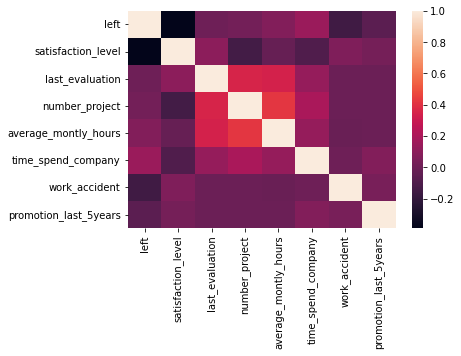

In [11]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

#### Moderately Positively Correlated Features: 
* last_evaluation with: number_project and average_montly_hours
* number_project with: average_montly_hours
* average_montly_hours with: number_project
    
#### Modereately Negatively Correlated Features: 
* left with: satisfaction_level and work_accident

This could show that those with more recent evaluations are given more projects which could lead to more hours worked.
Left being negatively correlated with satisfction_level, unsurprisingly shows a lower satisfaction level can lead to more employees leaving - similar to work_accident

### Statistical Test for Correlation
One-Sample T-Test (Measuring Satisfaction Level)

A one-sample t-test investigates if a sample mean differs from the population mean. Here, satisfaction has the strongest correlation with our dependent variable 'left'. Here I ran a test to see if the average satisfaction level of employees that left differs from the those did not leave.

Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who left and those who did not leave?

Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who left and those who did not..

Alternate Hypothesis: (H1: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who left and those who did not..

In [12]:
emp_population = df['satisfaction_level'][df['left'] == 0].mean()
emp_left_satisfaction = df[df['left']==1]['satisfaction_level'].mean()

print( 'The mean satisfaction_level for the employee population that did not leave: ' + str(emp_population))
print( 'The mean satisfaction_level for the employee population that left: ' + str(emp_left_satisfaction) )

The mean satisfaction_level for the employee population that did not leave: 0.666809590479516
The mean satisfaction_level for the employee population that left: 0.44009801176140917


Conducting a T-Test:
    
Let's conduct a t-test at 95% confidence level and see if it correctly rejects 
the null hypothesis that the sample comes from the same distribution as the employee population. 
To conduct a one sample t-test, we can use the stats.ttest_1samp() function

In [13]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['left']==1]['satisfaction_level'], # Sample of Employee satisfaction that left
                  popmean = emp_population)  # Employees that did not leave satisfaction mean

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

T-Test Result: 
    
The test statistic "t" is equal to -51.33 (2dp). 
(This test statistic tells us how much the sample mean deviates from the null hypothesis).
If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level 
and degrees of freedom, we reject the null hypothesis. 

We can check the quantiles with stats.t.ppf():

Test Quantile:

If the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can REJECT the null hypothesis:

In [14]:
degree_freedom = len(df[df['left']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


#### One-Sample T-Test Summary: 

* T-Test = -51.33 
* P-Value = 0.000
* Conclusion = Reject Null Hypothesis

Reject the null hypothesis because:

* T-Test score is outside the quantiles
* P-value is lower than confidence level of 5%

The incredibly low P-value of 0.000 at a 5% confidence level is a good indicator to reject the null hypothesis, but this does not neccessarily mean that there is practical significance. 
We would have to conduct more experiments or maybe collect more data about the employees in order 
to come up with a more accurate finding.

## 2b Distribution Plots

/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

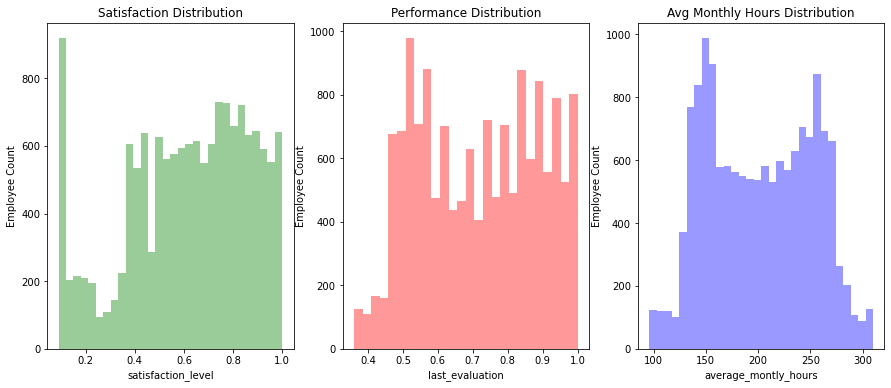

In [15]:
# Generating settings of plots 
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Performance (last_evaluation)
sns.distplot(df.last_evaluation, kde=False, color="r", ax=axes[1]).set_title('Performance Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title('Avg Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

Summary:

* Satisfaction - We can see that there is a huge spike for employees with the lowest possible satisfaction and also consistently high levels for high satisfaction above 0.5. This could indicate an area for more analysis to see if the batch of employees that are unsatisfied belong to a group, such as a particular team, salary group etc. 


* Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)


* AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours.  (less than 150 hours & more than 250 hoursThe evaluation and average monthly hour graphs both share a similar distribution.

Employees with lower average monthly hours were evaluated less and vice versa.
Referring back to the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

## 2c Description of the Dependent Variable 'left'

In [16]:
print(df['left'].value_counts())
print('\n')
print(df['left'].value_counts(normalize=True))

0    11428
1     3571
Name: left, dtype: int64


0    0.761917
1    0.238083
Name: left, dtype: float64


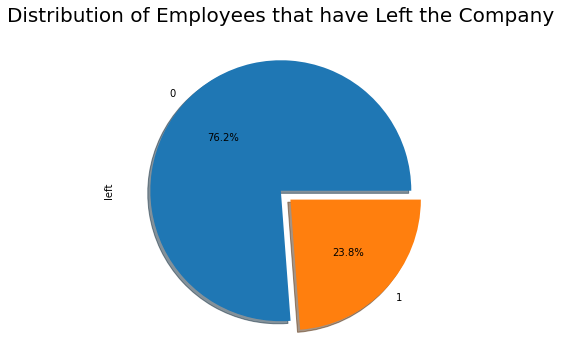

In [17]:
df['left'].value_counts().plot(kind= 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Employees that have Left the Company",fontsize=20)
plt.show()

It is worth noting that there is a large difference between the data of the 'left' variable. This, being the target variable 
for later classification methods, may present some challenges as most of the machine learning algorithms used for classification 
were designed around the assumption of an equal number of examples for each class. 

Plan: I intend to run the models without using solutions to class imbalance (namely SMOTE and ASASYN oversampling techniques) and assess
    whether or not the ML models are significantly impacted by the imbalance. 
    

## 2d Examining the relationship between Salary and Employees Leaving 

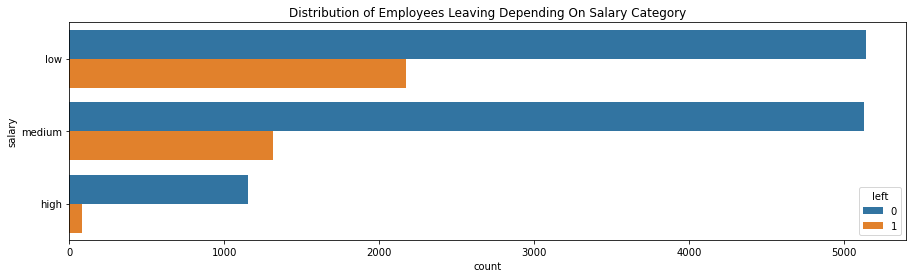

In [18]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Distribution of Employees Leaving Depending On Salary Category');

In [19]:
df_leave.salary.value_counts()


low       2172
medium    1317
high        82
Name: salary, dtype: int64

Summary: 

Majority of employees who left either had low or medium salary.
Very few employees on high salary left. 
Employees with low to average salaries tend to leave the company.

## 2e Examining the relationship between Department and Employees Leaving 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

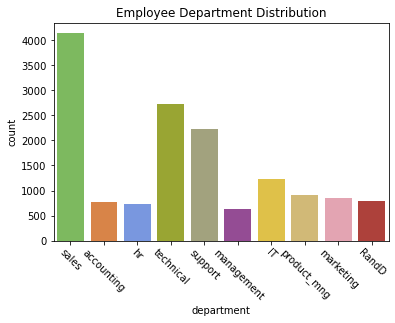

In [20]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

[Text(0.5, 0, 'Number of Employees'), Text(0, 0.5, 'Department')]

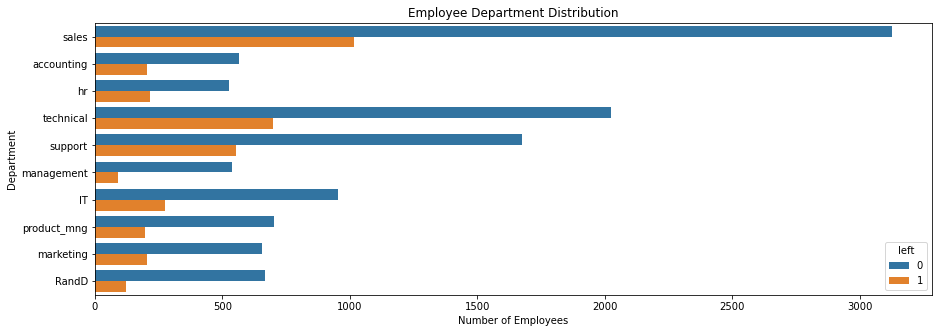

In [21]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=df).set_title('Employee Department Distribution');
ax.set(xlabel='Number of Employees', ylabel="Department")


The sales, technical, and support department were the top 3 departments for emplyees leaving. 
The management department had the smallest amount of turnover

[Text(0.5, 0, 'Number of Employees'), Text(0, 0.5, 'Salary')]

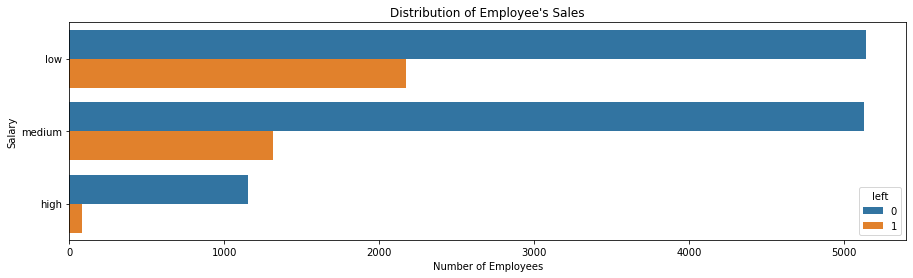

In [22]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title("Distribution of Employee's Sales");
ax.set(xlabel='Number of Employees',ylabel='Salary')

Here I isolate the 3 aforementioned departments to visualise the impact of salary on their leaving distributions:

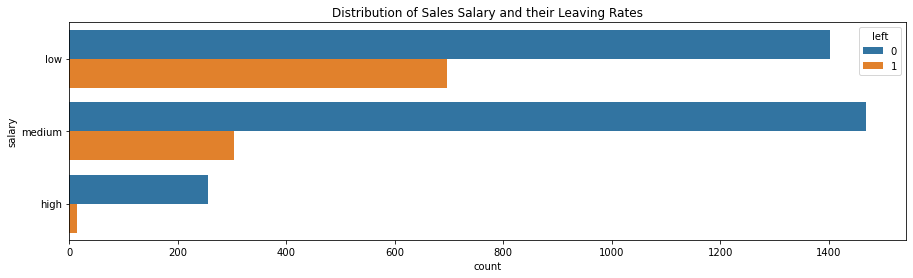

In [23]:
df_sales = df.drop(df.loc[df['department']!='sales'].index)

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df_sales).set_title('Distribution of Sales Salary and their Leaving Rates');

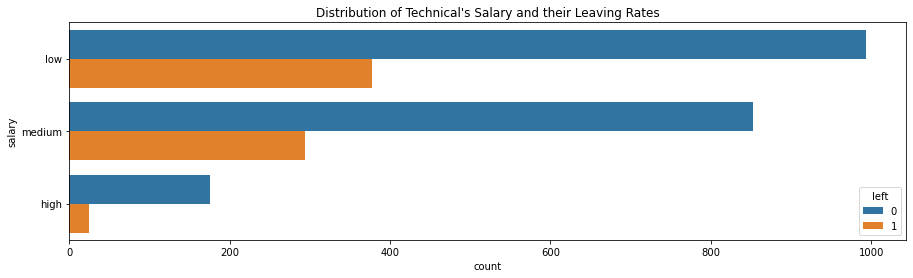

In [24]:
df_tech = df.drop(df.loc[df['department']!='technical'].index)

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df_tech).set_title("Distribution of Technical's Salary and their Leaving Rates");

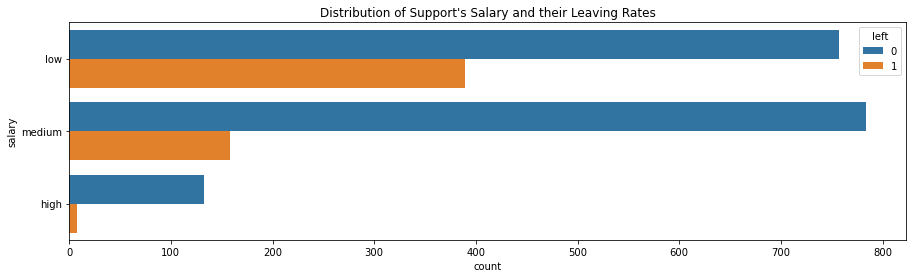

In [25]:
df_support = df.drop(df.loc[df['department']!='support'].index)

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df_support).set_title("Distribution of Support's Salary and their Leaving Rates");

In all three cases, those in the 'high' salary category are largely not leaving, whereas the greatest number of employees leaving occurs in the 'low' salary category

## 2f Examining the relationship between Number of Projects and Employees Leaving 

[Text(0.5, 0, 'Number of Projects'), Text(0, 0.5, 'Percent of Employees')]

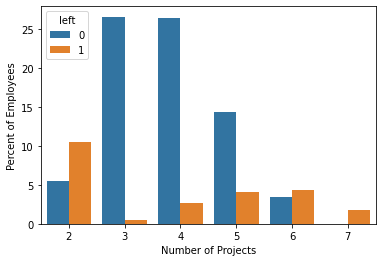

In [26]:
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(xlabel='Number of Projects', ylabel="Percent of Employees")

Summary: 

Employees with 2, 6, and 7 projects are leaving the company at a much greater rate than those with 3, 4, and 5. 

This could highlight that overwhelming and underwhelming employees with respobisbility could be an indicator that employees will want to leave. 

## 2g Examining the relationship between Last Evaluation and Employees Leaving 

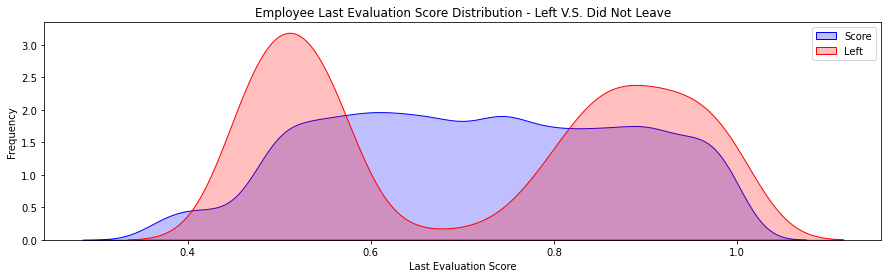

In [27]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='b',shade=True,label='Did Not Leave')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='r',shade=True, label='Left')
ax.set(xlabel='Last Evaluation Score', ylabel='Frequency')
plt.title('Employee Last Evaluation Score Distribution - Left V.S. Did Not Leave')
plt.legend(['Score','Left'])

Summary:

* There is a biomodal distribution. 
* Employees with low performance tend to leave the company more
* Employees with high performance tend to leave the company more
* The optimal range for last evaluation rating for employees that stayed is within 0.6-0.8. 

## 2h Examining the relationship between Average Monthly Hours and Employees Leaving 

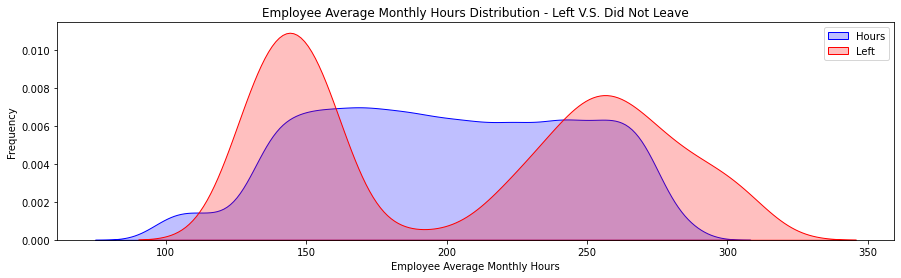

In [28]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='b',shade=True, label='Did Not Leave')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='Left')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee Average Monthly Hours Distribution - Left V.S. Did Not Leave')
plt.legend(['Hours','Left'])


Summary:

* Another bi-modal distribution.
* Employees who had less hours of work (~175 hours or less) left the company more
* Employees who had too many hours of work (~225 or more) left the company
* As seen in the analysis of the number of projects an employee is given, employees that are over or underwhelmed are leaving the company at a much greater rate. 

## 2i Examining the relationship between Satisfaction Levels and Employees Leaving 

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

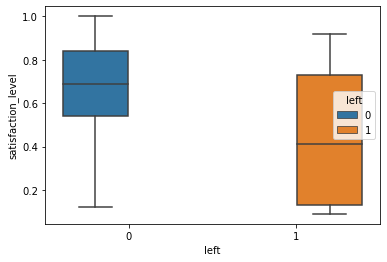

In [29]:
sns.boxplot(x="left", y="satisfaction_level", hue="left", data=df)

Text(0.5, 1.0, 'Employee Satisfaction Level Distribution - Left V.S. Did Not Leave')

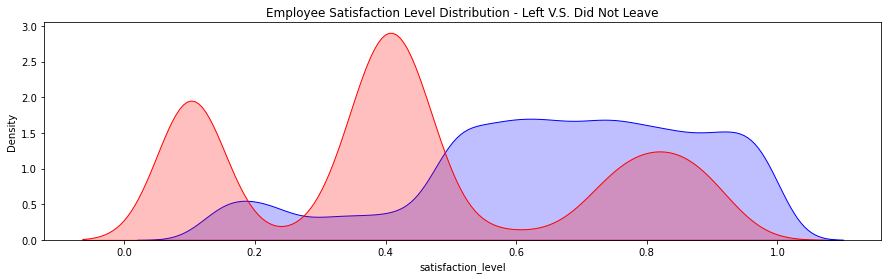

In [30]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='b',shade=True, label='Did Not Leave')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='Left')
plt.title('Employee Satisfaction Level Distribution - Left V.S. Did Not Leave')


Summary:

* There is a tri-modal distribution.
* Employees who had really low satisfaction levels (0.2 or less) left the company more
* Employees who had moderately low satisfaction levels (0.3~0.5) left the company more
* Employees who had really high satisfaction levels (0.7 or more) left the company more

It is no surprise that the employees with lower satisfaction levels are laeving at a higher rate, being unsatisfied increases the chances of employees looking elsewhere for employment. 

It is, however, more concerning that there is a third peak for employees with a high satisfaction rating. 

## 2j Examining the relationship between Number of Projects and Average Hours Worked

[Text(0.5, 0, 'Number of Projects'), Text(0, 0.5, 'Average Monthly Hours')]

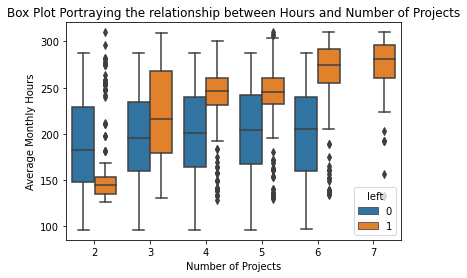

In [31]:
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
ax=sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df)
plt.title('Box Plot Portraying the relationship between Hours and Number of Projects')
ax.set(xlabel='Number of Projects', ylabel="Average Monthly Hours")


Summary:

* As project count increased, so did average monthly hours. A strong indication that work allocation policies need to be scrutinised - increasing projects is not necessarily an issue if the hours worked remain constant. Over-working employees comes from increasing the number of projects which consequently increases hours needed to work. 

* Employees that have stayed at the company, largely had consistent average_monthly_hours, despite the increase in projects

* In contrast, employees who did leave had an increase in average_monthly_hours with the increase in projects

Next I run the same analysis - but separating the dataset into the three departments with the highest rates of employees leaving:

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

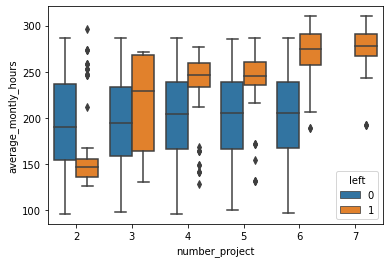

In [32]:
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df_sales)

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

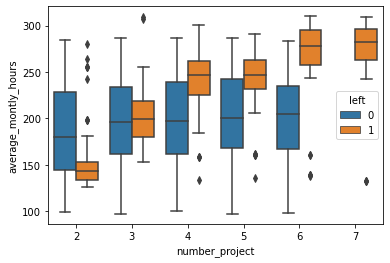

In [33]:
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df_tech)

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

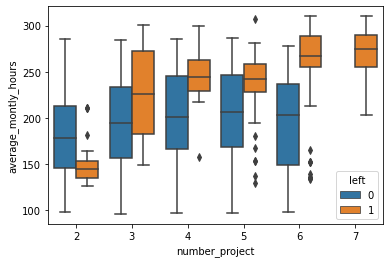

In [34]:
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df_support)

There are consistent patterns between all three of these departments. 

* Employees working on 7 projects are all leaving, and all show that increased number of projects has increased their hours. 

* The conclusions to be drawn are similar to the tests ran for the entire dataset. 

## 2k Examining the relationship between Time Spent at the Company and Employees Leaving 

Text(0.5, 1.0, "Distribution of Employee's Years Spent at the Company")

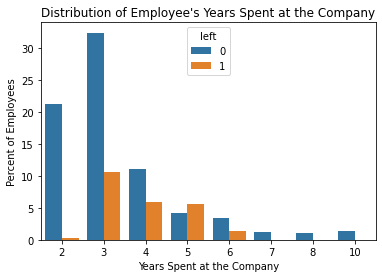

In [35]:
ax = sns.barplot(x="time_spend_company", y="time_spend_company", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent of Employees", xlabel='Years Spent at the Company')
plt.title("Distribution of Employee's Years Spent at the Company")


Summary:
    
* Employees who have just joined, or have been at the company for over 6 years are not likely at all to leave.
    
* More than half of the employees with 4 and 5 years left the company

* Employees with 5 years should highly be looked into

Employees leaving within the 3-5 year range could also be the result of employers looking to naturally progress or move on in their careers. 

## 2k Examining the relationship between Accidents at Work and Employees Leaving 

Text(0.5, 1.0, "Distribution of Employee's Suffering an Accident at the Company")

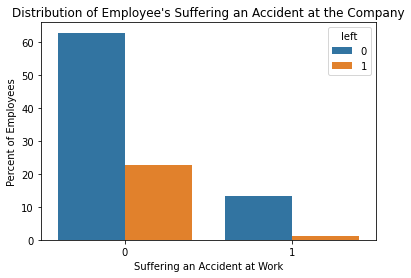

In [36]:
ax = sns.barplot(x="work_accident", y="work_accident", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent of Employees", xlabel='Suffering an Accident at Work')
plt.title("Distribution of Employee's Suffering an Accident at the Company")


## 2l Examining the relationship between Employee Satisfaction and Employee Performance 

This figure plots data points based on their satisfaciont level and their last evaluation performance. 

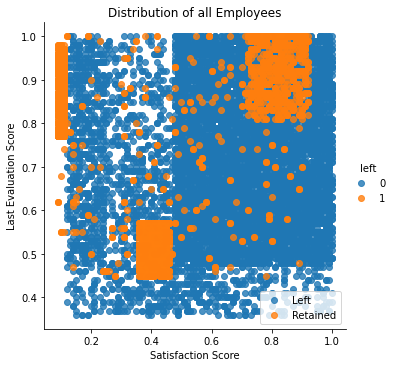

In [37]:
ax = sns.lmplot(x='satisfaction_level', y='last_evaluation', data=df, fit_reg=False, hue='left') 
plt.title('Distribution of all Employees')
plt.legend(['Left','Retained'])
ax.set(xlabel='Satisfaction Score', ylabel='Last Evaluation Score')

This is by far the most compelling graph. 

There are 3 distinct clusters for employees who left the company:
    
* Cluster 1 [Top Left] (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but were miserable. 
Such a group could be the result of overworking, and not being appreciative of the better employees


* Cluster 2 [Mid] (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This group could be seen as employees who are just not suited to their position or the company, or they could also be struggling employees that are not receiving adequate support.


* Cluster 3 [Top Right] (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. Those in this cluster which left, could have been great employees that were simply moving on to serve their ambitions or just try something new. 

## 3 Feature Importance 

By using a decision tree classifier, it could rank the features used for the prediction. The top four features were employee satisfaction, time at the company, last evaluation scores and average monthly hours. 

In building the classification models, we keep only these 4 features - this is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we use less features.

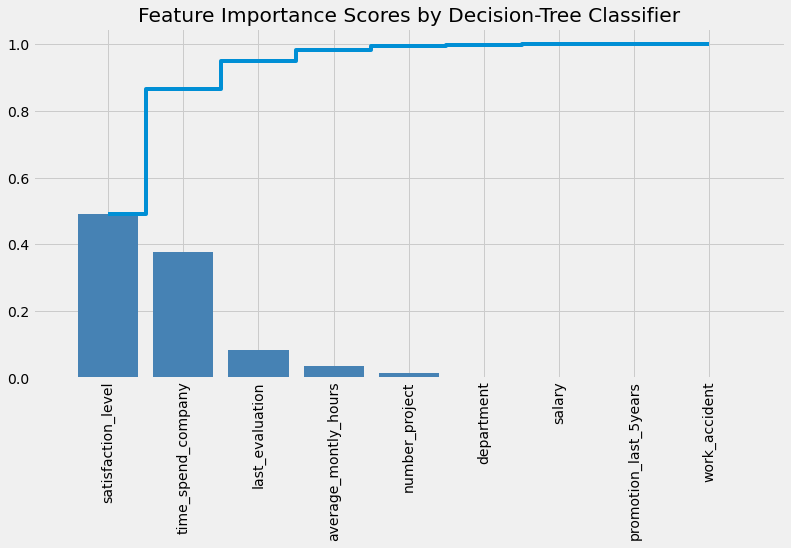

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'left'
X = df.drop('left', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=26, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['left'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importance Scores by Decision-Tree Classifier")
plt.bar(range(len(indices)), importances[indices], color='steelblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

The feature importance shows that the features: 'satisfaction_level', 'time_spend_company', 'last_evaluation', 'avearge_monthly_hours'
are the most important in determining if an employee may leave.    
    
    

# 4 Model Depolyment

### Logistic Regression Analysis

This section is analysis using logistic regression as a classifier. 

Logistic Regression commonly deals with the issue of how likely an observation is to belong to each group. 

Logistic Regression Clasification is a common technique that predicts the probability of a binary outcome. 
In contrast to linear regression,
the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. 
This is a useful model to take advantage of for this problem because we are interested in predicting whether an 
employee will leave (0) or stay (1).

Logistic regression is also the preferred model of choice because of its interpretability. 
Logistic regression predicts the outcome of the response variable (left) through a set of other explanatory 
variables, also called predictors. In context of this domain, the value of our response variable is categorized 
into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving 
the company and the value of 1 (one) represents the probability of an employee leaving the company. 

In [39]:
# Defining the parameters for logistic regression model construction

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create an intercept term for the logistic regression equation and defining the updated independent variables
df['int'] = 1
indep_var = ['satisfaction_level', 'time_spend_company', 'last_evaluation', 'average_montly_hours','int','left']
df = df[indep_var]

# Create train and test splits
target_name = 'left'
X = df.drop('left', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=26, stratify=y)

X_train.head()

,satisfaction_level,time_spend_company,last_evaluation,average_montly_hours,int
5530,0.70,3,0.54,198,1
7167,0.71,3,0.57,218,1
231,0.92,6,0.99,255,1
4152,0.27,6,0.47,217,1
6852,0.53,2,0.77,271,1


This is the new dataframe following the elimination of features that were deemed as unimportant by the decision tree feature importance technique. Also included is the intercept term.

In [40]:
# Generating the values for the coefficients of the logistic regression model

import statsmodels.api as sm
iv = ['satisfaction_level', 'time_spend_company', 'last_evaluation', 'average_montly_hours','int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.471663
         Iterations 6


satisfaction_level     -3.557825
time_spend_company      0.171361
last_evaluation         0.203143
average_montly_hours    0.001705
int                    -0.275534
dtype: float64

The following overall equation was developed:

Employee Turnover Score = satisfaction_level(-3.968218) + last_evaluation(0.846211) + number_project(-0.293512)
                          + average_montly_hours(0.004483) + time_spend_company(0.198816) + (-)0.071852

In [41]:
# Developing a function that uses the coefficients 
coef = answer.params
def y (coef, Satisfaction, TimeAtCompany, LastEval, AvgHours) : 
    return coef[4] + coef[0]*Satisfaction + coef[1]*TimeAtCompany + coef[2]*LastEval + coef[3]*AvgHours

import numpy as np

y1 = y(coef, 0.75, 4, 0.65, 210)
p = np.exp(y1) / (1+np.exp(y1))
p

0.14574645679062817

This function shows that: 
    
An Employee with 0.75 Satisfaction, 4 years of employment, 0.65 evaluation and averages 210 hours of monthly work
has a 14.57% chance of leaving the company.

With this logistic regression model, the scores can be used to evaluate the employees probability of leaving the company through different scoring metrics - for example placing each employee into a group. One example of grouping could be:

* Safe – Employees within this zone are considered safe.
* Low Risk – Employees within this zone are too be taken into consideration of potentially leaving. This is more of a long-term track.
* Medium Risk – Employees within this zone are somewhat at risk of leaving the company. Action should be taken and monitored accordingly.
* High Risk Zone - Employees within this zone are considered to have the highest chance of leaving. Action should be taken immediately.

So with our example above, the employee with a 14% probability of leaving would be in the safe zone.


### Alternative Classification Models 

Here I compare four classification techniques: Base Model, Logistic Regression, Decision Trees, and Random Forest Classification. 

Note: 
A Base Rate Model is a simple model or heuristic used as reference point for comparing how well a model is performing.  In this dataset, the majority class that will be predicted will be 0's, which are employees who did not leave the company. Exploring the Data, 23.8% of the dataset contained 1's (employee who left the company) and the remaining 76.2% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict every 0's and ignore all the 1's.
Example: The base rate accuracy for this data set, when classifying everything as 0's, would be 76.2% because 76.2% of the dataset are labeled as 0's (employees not leaving the company).

##### Evaluating the Model

As aforementioned, this dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down.

In this case, evaluating our model’s algorithm based on accuracy is the wrong thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: False Positive and False Negative errors.

False Positives (Type I Error): You predict that the employee will leave, but do not

False Negatives (Type II Error): You predict that the employee will not leave, but does leave

In this problem, what type of errors do we care about more? False Positives or False Negatives?

Different Ways to Evaluate Classification Models Included in this report include

Predictive Accuracy: How many does it get right?

Speed: How fast does it take for the model to deploy?

Scalability: Can the model handle large datasets?

Robustness: How well does the model handle outliers/missing values?

Interpretability: Is the model easy to understand?

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [43]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [44]:
# Create train and test splits
target_name = 'left'
X = df.drop('left', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=26, stratify=y)

In [45]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [46]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.78


In [47]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.792 (0.013)


### Comparing the Logistic Regression v Decision Trees v Random Forest Model

In [48]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



 ---Logistic Model---
Logistic AUC = 0.78
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2286
           1       0.51      0.79      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.79      3000



 ---Decision Tree Model---
Decision Tree AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2286
           1       0.90      0.92      0.91       714

    accuracy                           0.96   

/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



### Class Imbalance

Initial observations of the dependent variable 'left' showed that there was a skew in the data of the variable which may have needed to be addressed with techniques such as undersampling, oversampling and more likely SMOTE and ADASYN techniques to oversample the minority data. 

The results from the various classification techniques indicate that for the purpose of this report, such solutions to the class imbalance are not required and we can proceed.

The Random Forest Model is the superior classification model with this dataset. 

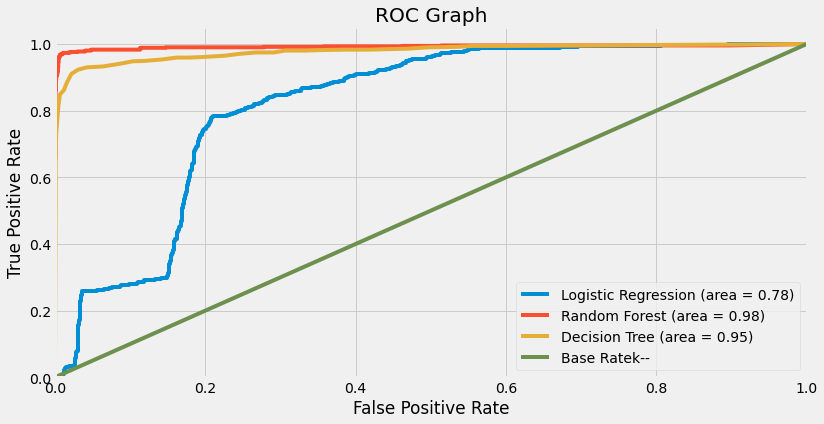

In [49]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [50]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.098 seconds


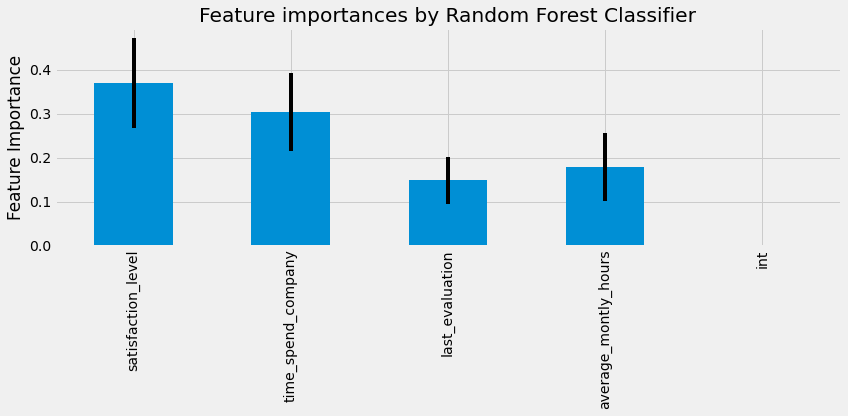

In [51]:
forest_importances = pd.Series(importances, index=iv)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances by Random Forest Classifier")
ax.set_ylabel("Feature Importance")
fig.tight_layout()

The Random Forest Model was the best-performing classification model, but for interpretability and ease of use I continue to use the logistic regression analysis to create the equation to predict employee departure. 

# 5 SUMMARY

From all the analysis reported here, the company's employees can be clustered into distinct groups that generally leave when they:

* Are working excessive hours, especially those working over 250 hours a month
* Are not working enough hours, especially those working less than 150 hours a day
* Score really high, or low, in their recent evaluations
* Have salaries categorised as low
* Are given 2, 6, or 7 projects to work on
* Have spent between 3 and 5 years at the company

We also know that the most importnat factors in determining an employee's likelihood of departure are:
* Satisfaction
* Years at the Company
* Average Hours
* Last Evaluation Scores

### Potential Solutions

Solution 1:

With the Employee Departure Equation, we now have a mechanism by which we can rank employees based on their probability of leaving. 

We can use these groupings to allocate a limited incentive budget to the hightest probability instances

Solution 2:

We can develop a system to monitor the hours and responsibility given to an employee to prevent the effects of working excessive hours - likely overworking the best employees

Solution 3:

Introduce a survey system that allows management to understand how the work conditions are affecting their employees. 

By flagging individual opinions, we can generate more accurate answers to the questions raised by the analyses:
* Are employees content with their responsibilities?
* Do the employees feel supported?
* Do management need to address the company's culture?

### Improvements for future analysis

Improving the retention of employees is a continuous process taht will need to be revisited frequently.
In order to maximise the impact data analysis can have on future reports, some suggestions for imporved data collectino would be to include:
* Gender
* Distance travelled to get to work
* Number of companies worked at
* Years with current manager
* Reason for leaving (fired - could explain people with low hours worked etc)

These variables are examples of additions that would enrich the data available for analysis and allow our predictions for departure probability to be further enhanced